In [1]:
import numpy as np
import cv2
import h5py
import matplotlib.pyplot as plt
from deepposekit import VideoReader, KMeansSampler
#from dpk_annotator import VideoReader, KMeansSampler
import tqdm
import glob

from os.path import expanduser
home = expanduser("~")

Using TensorFlow backend.


In [2]:
# use glob to get the path(s) of the video(s)
videos = glob.glob(home + '/deepposekit-data/datasets/fly/*.avi')
videos

['/home/jake/deepposekit-data/datasets/fly/video_aligned.avi']

In [3]:
reader = VideoReader(videos[0], batch_size=100, gray=True)
frame = reader.read() # read a single frame
reader.close()

True

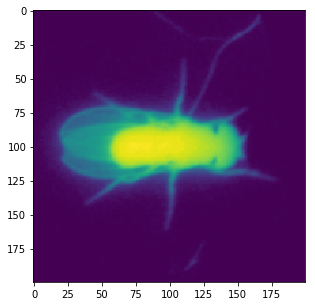

True

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(frame[...,0])
plt.show()

# save image for initializing the annotation skeleton
cv2.imwrite(home + '/deepposekit-data/datasets/fly/skeleton_image.png', frame)

In [5]:
reader = VideoReader(videos[0], batch_size=100, gray=True)

sampled_frames = []
for idx in tqdm.tqdm(range(len(reader)-1)):
    batch = reader[idx]
    random_sample = batch[np.random.choice(batch.shape[0], 10, replace=False)]
    sampled_frames.append(random_sample)
reader.close()

sampled_frames = np.concatenate(sampled_frames)

100%|██████████| 99/99 [00:10<00:00,  9.63it/s]


In [6]:
kmeans = KMeansSampler(n_clusters=10, max_iter=1000, n_init=10, batch_size=100, verbose=True)
kmeans.fit(sampled_frames)

Init 1/10 with method: k-means++
Inertia for init 1/10: 725938666.582273
Init 2/10 with method: k-means++
Inertia for init 2/10: 729322016.424548
Init 3/10 with method: k-means++
Inertia for init 3/10: 727028358.791934
Init 4/10 with method: k-means++
Inertia for init 4/10: 737468202.783626
Init 5/10 with method: k-means++
Inertia for init 5/10: 735542806.695846
Init 6/10 with method: k-means++
Inertia for init 6/10: 739914555.956380
Init 7/10 with method: k-means++
Inertia for init 7/10: 744525732.873835
Init 8/10 with method: k-means++
Inertia for init 8/10: 741880180.834498
Init 9/10 with method: k-means++
Inertia for init 9/10: 729589130.857094
Init 10/10 with method: k-means++
Inertia for init 10/10: 738867470.093655
Minibatch iteration 1/10000: mean batch inertia: 2446916.974866, ewa inertia: 2446916.974866 
Minibatch iteration 2/10000: mean batch inertia: 2561333.506298, ewa inertia: 2470008.101290 
Minibatch iteration 3/10000: mean batch inertia: 2417639.089950, ewa inertia: 24

KMeansSampler(batch_size=100, compute_labels=True, init='k-means++',
       init_size=None, max_iter=1000, max_no_improvement=10, n_clusters=10,
       n_init=10, random_state=None, reassignment_ratio=0.01, tol=0.0,
       verbose=True)

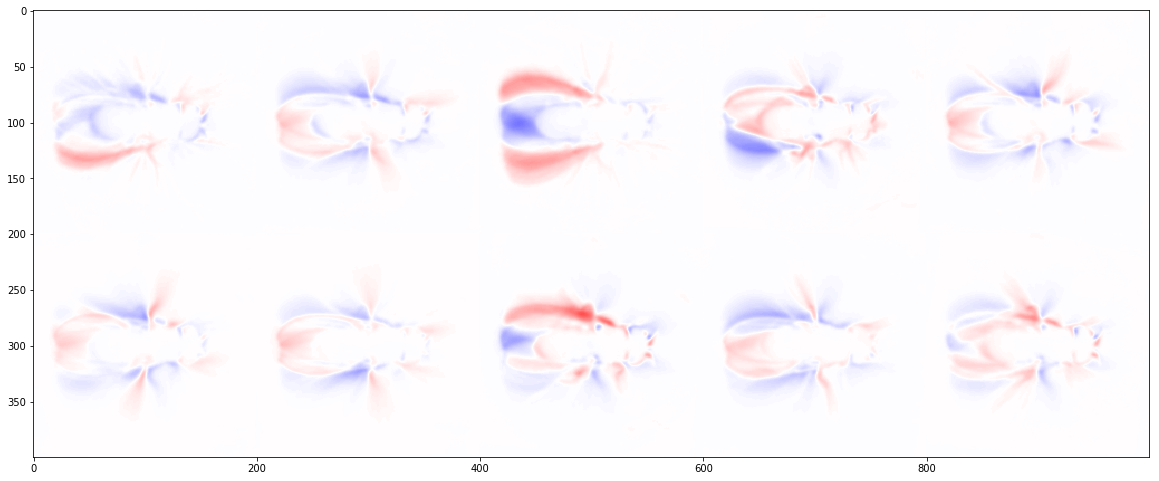

In [7]:
kmeans.plot_centers(n_rows=2)
plt.show()

In [8]:
images, labels = kmeans.sample_data(sampled_frames, n_samples_per_label=10)
images.shape

Computing label assignment and total inertia
Computing label assignment and total inertia


(100, 200, 200, 1)

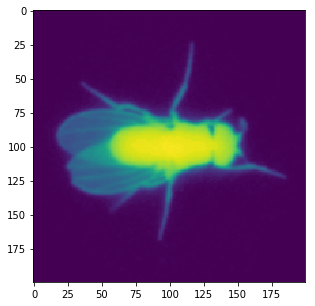

In [9]:
with h5py.File('fly_annotation_data.h5', mode='w') as h5file:
    h5file.create_dataset('images', shape=images.shape, dtype=np.uint8, data=images)

with h5py.File('fly_annotation_data.h5', mode='r') as h5file:
    h5image = h5file['images'][0]

plt.figure(figsize=(5,5))
plt.imshow(h5image[..., 0])
plt.show()

h5file.close()